## Diabetes prediction model.

Predicting the diabetes in a patient using KNN Classifier. The dataset for this project is taken from https://www.kaggle.com/uciml/pima-indians-diabetes-database. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data description and preparation

In [2]:
data = pd.read_csv('C:\Python Scripts\ML_cwiczenia\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# number of rows and columns in dataset
data.shape

(768, 9)

In [4]:
# create numpy arrays for features and target
X = data.drop(columns=['Outcome'])
y = data['Outcome'].values

y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

### Building and training model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
# testing model
knn.predict(X_test)
knn.score(X_test, y_test)

0.6770833333333334

Our result is good, but we will check if we can improve it by choosing the optimal number k

In [23]:
from sklearn.model_selection import cross_val_score
neighbors = list(range(1,10))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

We can visualize the optimal k value taking into account the classification error.

Optimal k is 8


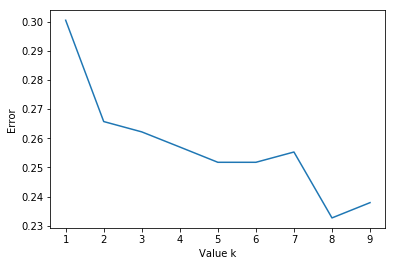

In [24]:
MSE = [1 - x for x in cv_scores]

opt_k = neighbors[MSE.index(min(MSE))]
print("Optimal k is %d" % opt_k)

plt.plot(neighbors, MSE)
plt.xlabel('Value k')
plt.ylabel('Error')
plt.show()


The lowest error is received at k = 8, so this value is included in our model.

In [25]:
# Retrain model using optimal k-value
knn = KNeighborsClassifier(n_neighbors=8) 
knn.fit(X_train, y_train)
knn.predict(X_test)
knn.score(X_test, y_test)

0.7083333333333334

Choosing the optimal k=8 our model has improved to 70%.

### Model evaluation

##### Cross-Validation

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.
The above received value of k=7 was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

Below we use k-Fold Cross-Validation

In [26]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=8) 

#train model with cv of 5
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

# print each cv score (accuracy) and average of them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.74025974 0.72077922 0.75974026 0.79084967 0.73856209]
cv_scores mean:0.7500381970970207


Using cross-validation our mean score has improved to 75,0%.

##### Hyperparameter tuning using GridSearch
GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.

In [27]:
from sklearn.model_selection import GridSearchCV

knn_two = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors':np.arange(1, 50)}

knn_grid = GridSearchCV(knn_two, param_grid, cv=5)
knn_grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
knn_grid.best_score_

0.7578125

In [29]:
knn_grid.best_params_

{'n_neighbors': 14}

By using grid search the knn classifier with number of neighbors as 14 achieves the best score/accuracy of 0.7578 i.e about 76%.
